In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# import sys
# import statistics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [42]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis_copy.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'files_for_lab/csv_files/marketing_customer_analysis_copy.csv'

In [39]:
data.shape

(9134, 24)

In [40]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [41]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [8]:
# Standardize header names.

headers = data.columns

headers2 = []
for i in range (len(headers)):
    h = headers[i].replace(" ", "_").lower().strip()
    headers2.append(h)
    
data.columns = headers2

In [9]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
# Check and deal with NaN values
data.isna().sum()/data.shape[0]*100
pd.DataFrame(round(data.isna().sum()/len(data),4)*100)

,0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


In [12]:
# Datetime format - Extract the months from the dataset and store in a separate column.
# Then filter the data to show only the information for the first quarter , ie Jan Feb and March

In [13]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [14]:
data['effective_to_month'] = pd.DatetimeIndex(data['effective_to_date']).month
data.shape

(9134, 25)

In [15]:
dataQ1 = data[(data['effective_to_month']==1) | (data['effective_to_month']==2) | (data['effective_to_month']==3)]

# dataQ1.shape
dataQ1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [16]:
# Show DataFrame info

# data.info
# print (data)
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [17]:
# Describe DataFrame.
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


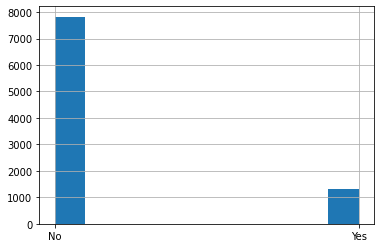

In [18]:
# Show a plot of the total number of responses

data['response'].hist()
plt.show()

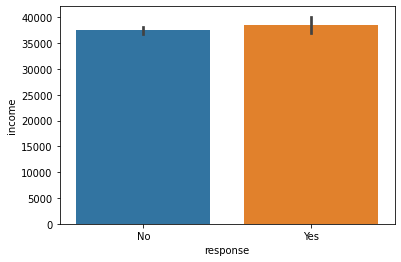

In [19]:
# Show a plot of the response rate by the sales channel.
# Show a plot of the response rate by the total claim amount.
# Show a plot of the response rate by income.

sns.barplot(x="response", y="income", data = data)
plt.show()

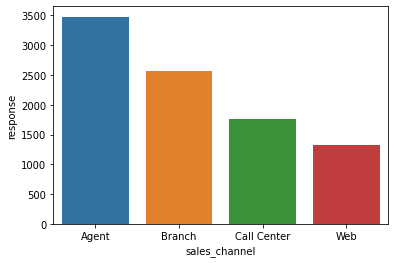

In [20]:
# trimmed = data.filter(items=['Response', 'Sales Channel', 'Total Claim Amount', 'Income'])
# channelxresponse = trimmed.groupby(["Sales Channel"]).count().sort_values(["Response"], ascending=False).reset_index()

channelxresponse = data.groupby(["sales_channel"]).count().reset_index()
channelxresponse

sns.barplot (x="sales_channel", y="response", data = channelxresponse)
plt.show()

In [21]:
# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals

# type(data.select_dtypes('object'))
numericals = data.select_dtypes(include=[np.number])
categoricals = data.select_dtypes(include=[np.object])

numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2


In [22]:
# Use seaborn library to construct distribution plots for the numerical variables

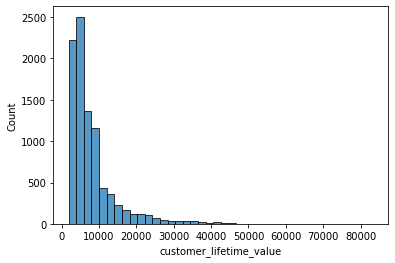

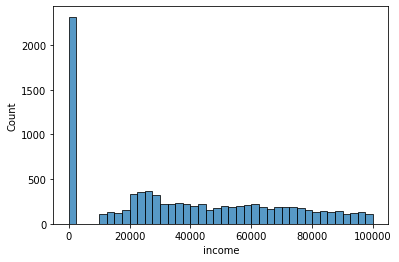

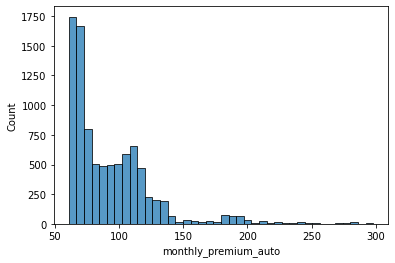

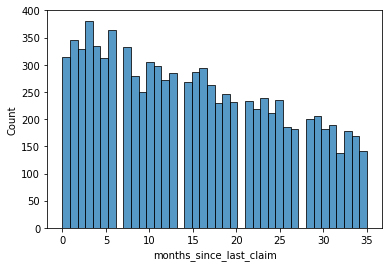

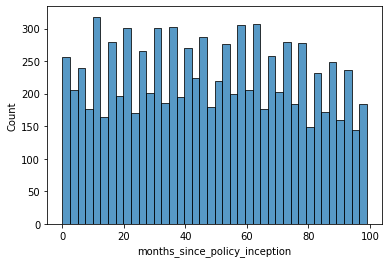

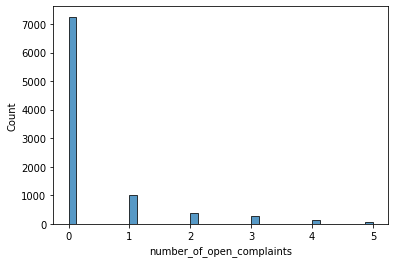

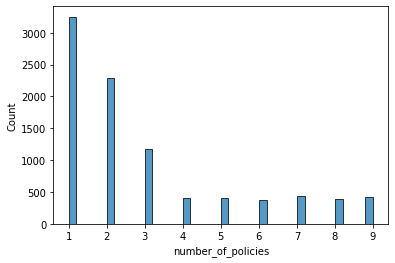

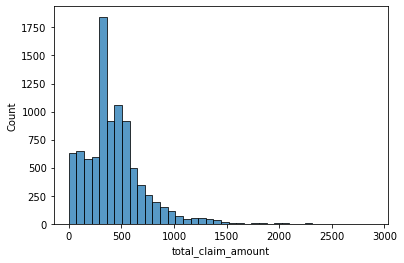

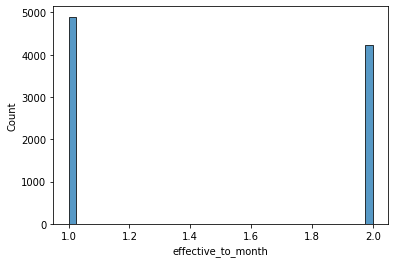

In [23]:
# sns.histplot(numericals['income'],bins=40)
# plt.show()

for i in range(numericals.shape[1]):
    sns.histplot(numericals[numericals.columns[i]], bins=40)
    plt.show()

In [24]:
# Use Matplotlib to construct histograms

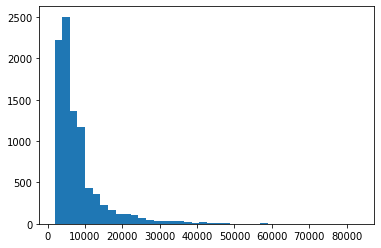

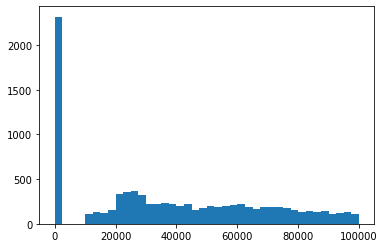

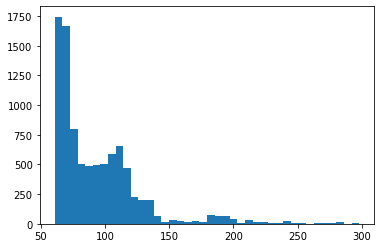

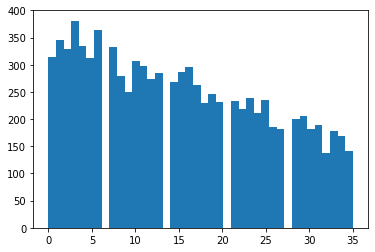

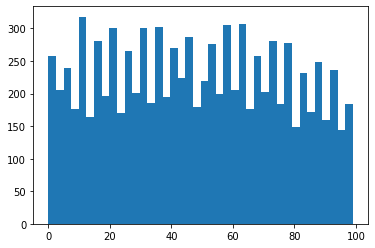

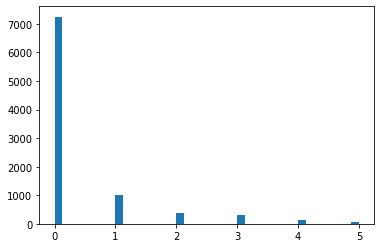

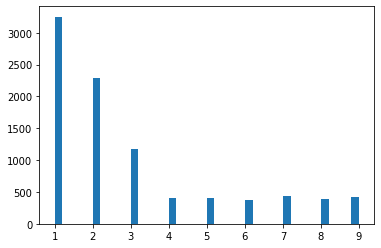

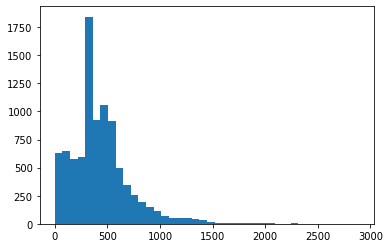

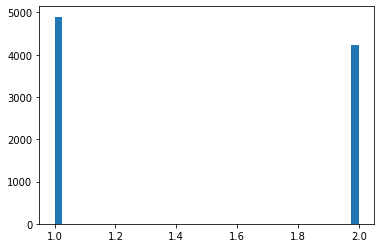

In [25]:
# plt.hist(numericals['total_claim_amount'], bins=40)
# plt.show()

for i in range(numericals.shape[1]):
    plt.hist(numericals[numericals.columns[i]], bins=40)
    plt.show()

In [26]:
# For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column total_claim_amount later as the target variable.

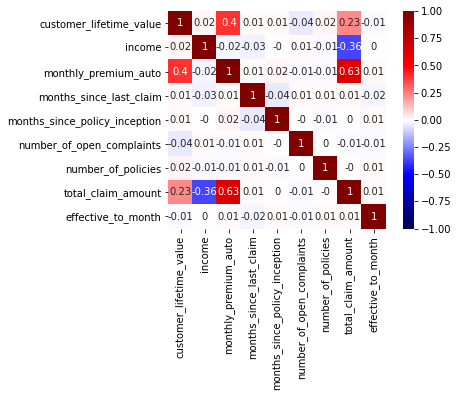

In [27]:
sns.heatmap(numericals.corr().round(2),vmin=-1, vmax=1, center=0, annot = True,square=True, cmap='seismic')
plt.show()

In [28]:
# Further processing...
# X-y split.

In [29]:
Y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)

In [30]:
type(X)

pandas.core.frame.DataFrame

In [31]:
# Normalize (numeric)

In [32]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [33]:
X_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2


In [34]:
X_num.shape

(9134, 9)

In [35]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
X_num_normalized = transformer.transform(X_num)

# print(X_num_normalized.shape)

X_N = pd.DataFrame(X_num_normalized)

X_N.columns = X_num.columns

# X_num_normalized.head()

X_N.head()

# type(pd.DataFrame(X_num_normalized))

# type(X_num_normalized)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830,0.000035
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005,0.000141
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230,0.000040
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,0.000130
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145,0.000046


In [36]:
X_N.shape

(9134, 9)

In [37]:
X_cat.shape

(9134, 15)